In [6]:
import pandas as pd
df = pd.read_csv(r"C:\Users\bluecom011\Desktop\module_2\train\wine\winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.shape

(1599, 12)

In [8]:
df.dtypes


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
#renaming columns to eliminate gaps in between column titles
def renaming(df):
    df.rename(columns={'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity',
                  'citric acid':'citric_acid', 'residual sugar':'residual_sugar',
                  'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'},
              inplace=True)

renaming(df)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
# 범주형 데이터 확인 (quality 제외)
categorical_features = [col for col in df.columns if col != 'quality' and df[col].dtype == 'object']

# 원핫 인코딩 수행 (quality 제외)
encoded_data = pd.get_dummies(df, columns=categorical_features, drop_first=True) 

# features (X)와 target variable (y) 분리
X = encoded_data.drop('quality', axis=1)  # quality 열 제거 (타겟 변수)
y = encoded_data['quality']  



In [12]:
encoded_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
print(df.columns)  # This will print all column names in the dataframe


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [ ]:
import pandas as pd
# Perform one-hot encoding based on the 'quality' column
# If 'quality' >= 6, set to 1, else set to 0
df['quality_encoded'] = (df['quality'] >= 6).astype(int)

# # Save the modified DataFrame to a new CSV file
# output_file_path = '/mnt/data/winequality-red-encoded.csv'
# df.to_csv(output_file_path, index=False)

# output_file_path

In [15]:
# 1. Quality column one-hot encoding: 6 or higher becomes 1, less than 6 becomes 0
df['quality_encoded'] = (df['quality'] >= 6).astype(int)

# 2. Min-Max scaling for numerical data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
df_scaled['quality'] = df['quality_encoded']  # Append the transformed 'quality' column back

# Check the transformed dataframe
df_scaled.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0


In [16]:
# Save the transformed dataframe to a CSV file
df_scaled.to_csv(r'C:/Users/bluecom011/Desktop/module_2/data/transformed_winequality-red.csv', index=False)


In [17]:
# Assuming reference_df has already been defined and transformed as shown in your code snippet

# Split the dataframe back into features (X) and target (y)
X = df_scaled.drop('quality', axis=1)
y = df_scaled['quality']

# Use to_pickle function to save X and y as pickle files
xTrainName = r"C:\Users\bluecom011\Desktop\module_2\train/winexTrain1.pkl"  # Adjusted path for this environment
yTrainName = r"C:\Users\bluecom011\Desktop\module_2\train/wineyTrain1.pkl"

X.to_pickle(xTrainName)
y.to_pickle(yTrainName)

# Return the paths to confirm saving
(xTrainName, yTrainName)


('C:\\Users\\bluecom011\\Desktop\\module_2\\train/winexTrain1.pkl',
 'C:\\Users\\bluecom011\\Desktop\\module_2\\train/wineyTrain1.pkl')

In [18]:
print(type(X),type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [19]:
import pandas as pd  #for data manipulation operations
import numpy as np  #for numeric operations on data
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations

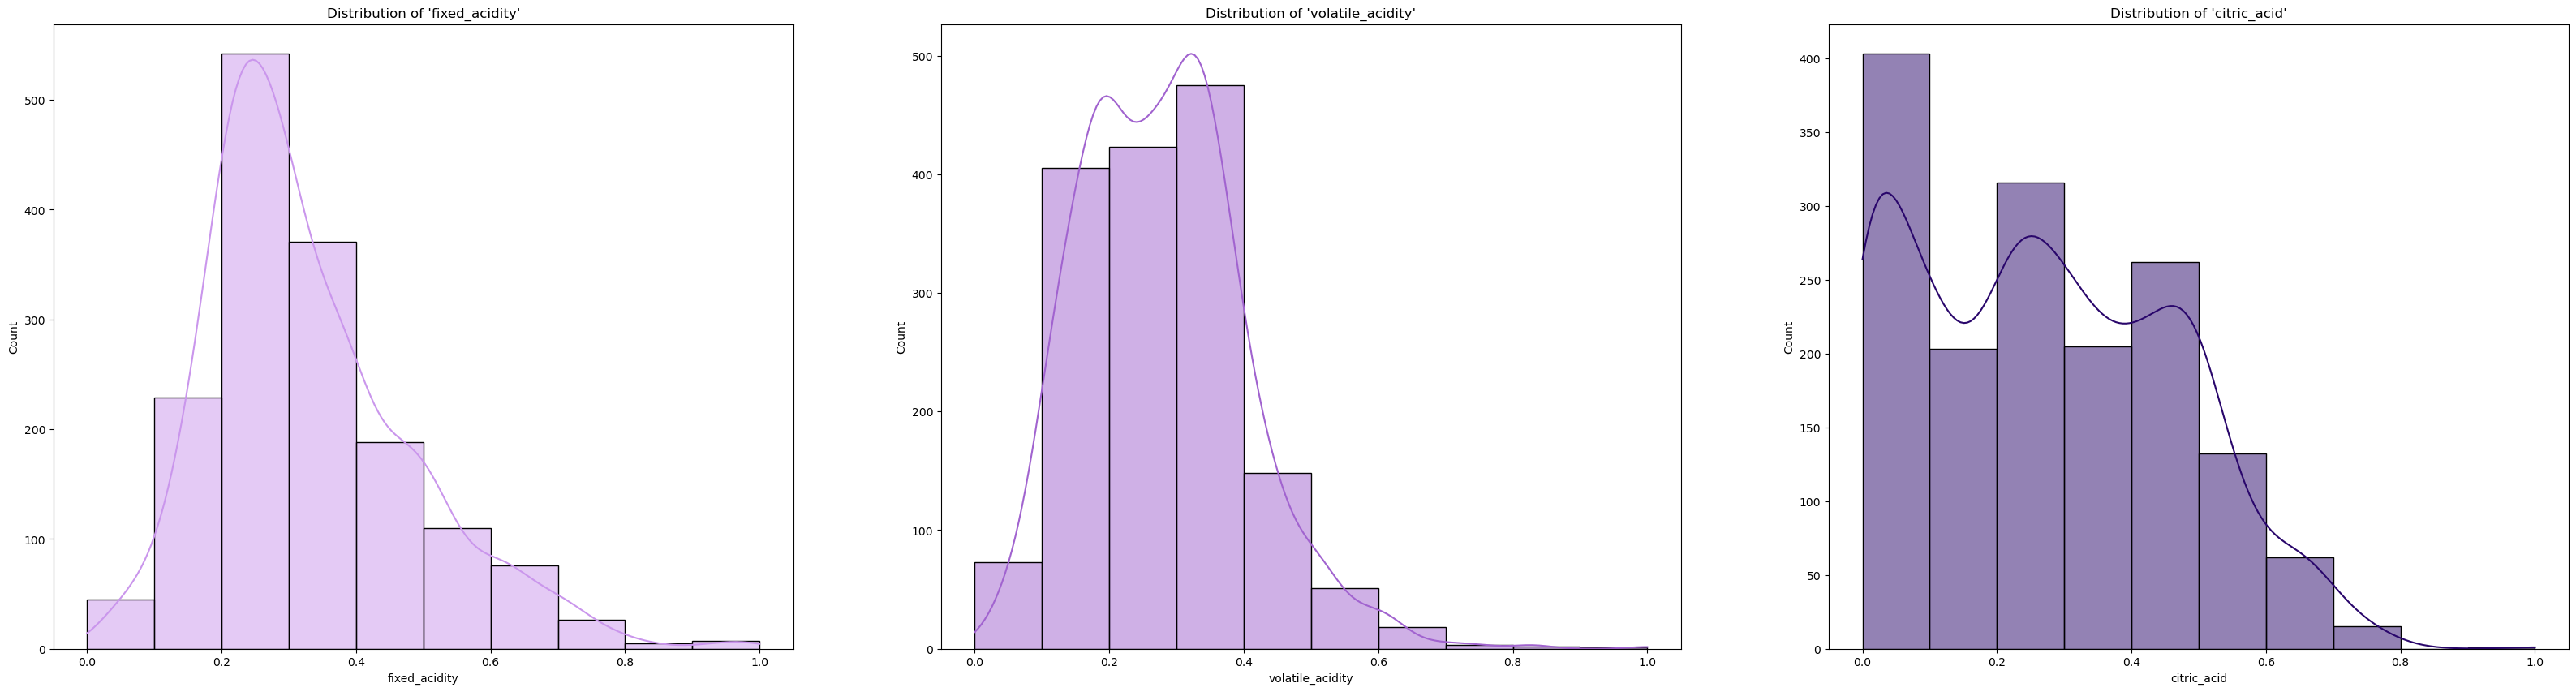

In [21]:
fig, axes = plt.subplots(1, 3, figsize = (40, 10))

sns.histplot(ax = axes[0], x = df_scaled["fixed_acidity"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#CA96EC").set(title = "Distribution of 'fixed_acidity'");

sns.histplot(ax = axes[1], x = df_scaled["volatile_acidity"],
             bins = 10,
             cbar = True,
             kde = True,
             color = "#A163CF").set(title = "Distribution of 'volatile_acidity'");

sns.histplot(ax = axes[2], x = df_scaled["citric_acid"],
             bins = 10,
             kde = True,   
             cbar = True,
             color = "#29066B").set(title = "Distribution of 'citric_acid'");

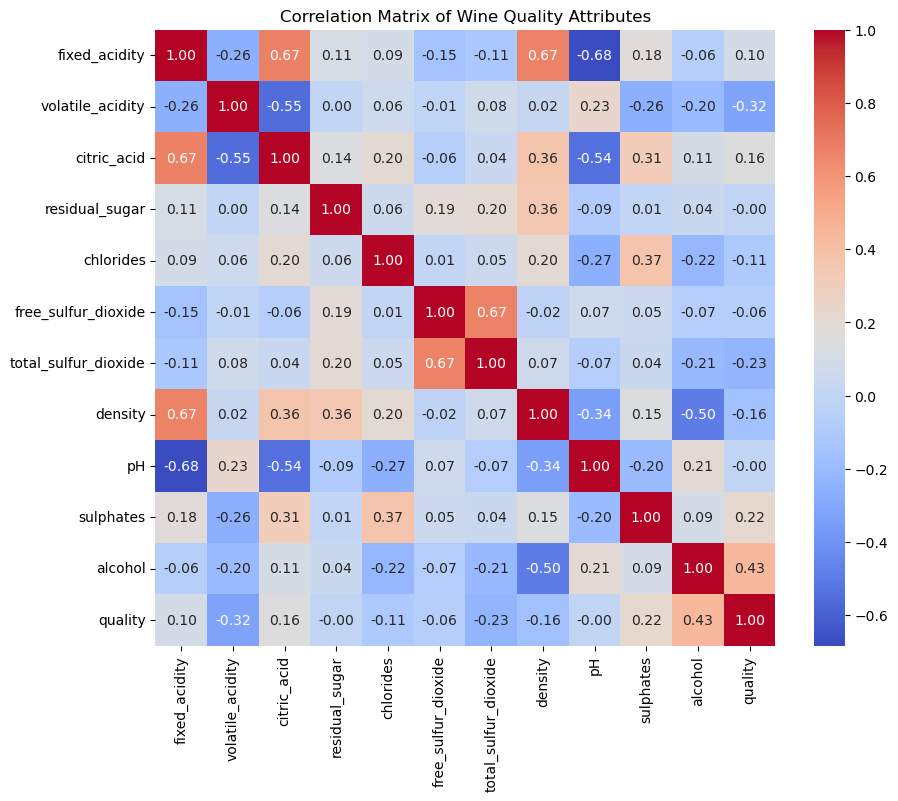

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 데이터 불러오기
df_transformed = pd.read_csv(r'C:\Users\bluecom011\Desktop\module_2\data\transformed_winequality-red.csv')

# 상관계수 행렬 계산
corr_matrix = df_transformed.corr()

# 상관계수 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Wine Quality Attributes")
plt.show()


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 데이터프레임에 상수항 추가 (VIF 계산을 위해 필요)
X = add_constant(df_transformed.drop('quality', axis=1))  # quality 열을 제외한 데이터 사용

# VIF 계산
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data
#1	fixed_acidity	7.767512
#8	density	6.34376  가 다중공선성 의심

,feature,VIF
0,const,86.756986
1,fixed_acidity,7.767512
2,volatile_acidity,1.789390
3,citric_acid,3.128022
4,residual_sugar,1.702588
5,chlorides,1.481932
6,free_sulfur_dioxide,1.963019
7,total_sulfur_dioxide,2.186813
8,density,6.343760
9,pH,3.329732


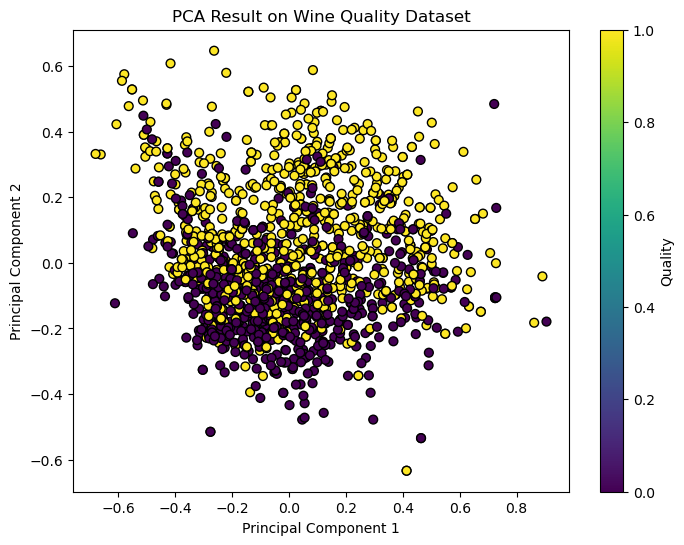

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

df_transformed = pd.read_csv(r'C:\Users\bluecom011\Desktop\module_2\data\transformed_winequality-red.csv')

# PCA 모델 정의 (2차원으로 축소)
pca = PCA(n_components=2)

# 품질 열을 제외한 특성 데이터에 PCA 적용
X_pca = pca.fit_transform(df_transformed.drop('quality', axis=1))

# 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_transformed['quality'], cmap='viridis', edgecolor='k', s=40)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Quality')
plt.title('PCA Result on Wine Quality Dataset')
plt.show()


In [28]:
X_pca.shape

(1599, 2)

In [30]:
pathFolder = "./train/"
yTrainName = "wineyTrain1.pkl"
with open(pathFolder+yTrainName,'rb') as f2:
    y = pickle.load(f2)

In [32]:
y_np=y.to_numpy()

In [35]:
y_np

array([0, 0, 0, ..., 1, 0, 1])

In [38]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense
from keras.utils import np_utils
import numpy as np

# 가상의 데이터 생성 (예시로 사용)
X = X_pca
y = y_np

# 데이터 차원 변환 (1599, 1, 2, 1) 형태로
X_reshaped = X.reshape((1599, 1, 2, 1))

# 모델 생성
model = Sequential()
model.add(Conv2D(32, kernel_size=(1, 2), activation='relu', input_shape=(1, 2, 1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()

# 모델 학습 (적절한 epochs와 batch_size 선택 필요)
# model.fit(X_reshaped, y, epochs=10, batch_size=32)


ModuleNotFoundError: No module named 'keras'

In [20]:
# numpy의 tile 함수를 사용하여 비정형 데이터 분석 방식으로 3차원 데이터 생성
import numpy as np
import pandas as pd
reference_df = pd.read_csv(r"C:\Users\bluecom011\Desktop\module_2\data\transformed_winequality-red.csv")

# 원본 데이터에서 'quality' 열을 제외한 데이터 추출
X_original = reference_df.drop(columns=['quality']).values

# tile 함수를 사용하여 3차원 데이터 생성
# 예시로, 각 샘플을 3회 반복하여 차원을 확장
X_tiled_3d = np.tile(X_original, (1, 3)).reshape(X_original.shape[0], X_original.shape[1], 3)

# 결과 확인 (첫 샘플의 변환된 3차원 데이터)
X_tiled_3d[0]

array([[0.24778761, 0.39726027, 0.        ],
       [0.06849315, 0.10684474, 0.14084507],
       [0.09893993, 0.56754772, 0.60629921],
       [0.13772455, 0.15384615, 0.24778761],
       [0.39726027, 0.        , 0.06849315],
       [0.10684474, 0.14084507, 0.09893993],
       [0.56754772, 0.60629921, 0.13772455],
       [0.15384615, 0.24778761, 0.39726027],
       [0.        , 0.06849315, 0.10684474],
       [0.14084507, 0.09893993, 0.56754772],
       [0.60629921, 0.13772455, 0.15384615]])

In [27]:
X_tiled_3d.shape

(1599, 11, 3)

In [26]:
type(X_tiled_3d)

numpy.ndarray

In [25]:
import pickle

# 파일 저장 경로
file_path = r"C:\Users\bluecom011\Desktop\module_2\train\X_tiled_3d.pkl"

# 배열을 pickle 파일 형식으로 저장
with open(file_path, 'wb') as f:
    pickle.dump(X_tiled_3d, f)
